# Random Forest & XGB Models

In [74]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
from collections import OrderedDict

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

import sklearn.model_selection
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, NearMiss

import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
def random_forest_general(df, target, method):
    # baseline logistic regression. 
    # penalty = 'l2', ridge. , solver = 'liblinear'
    X = df.drop(target, axis=1)
    y = df[target]

    # training and testing sets
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state = 42, stratify=y)

    # Instantiate model
    rf = RandomForestClassifier(oob_score=True, random_state=30)

    # Train the model on training data
    rf.fit(X_train, y_train)

    # Out of Bag Error
    # oob_score = rf.oob_score_ # score  = 1- oob error
    print('OOB Score: %.2f' % rf.oob_score_ )
    
    # Scores
    y_predict_test = rf.predict(X_test)
    print("Test accuracy score:", round(accuracy_score(y_predict_test, y_test), 3))
    
    # Classification report
    print("\n Test Classification Report:")
    print(classification_report(y_test, y_predict_test))
     
def random_forest_tuned(df, target, method):
    X = df.drop(target, axis=1)
    y = df[target]

    # training and testing sets
    X_sample, X_test, y_sample, y_test = \
    train_test_split(X, y, random_state = 42, stratify=y)
    
    # resampling methods
    # sampling strategy = (ratio : minority / majority) could be 'auto' or 1. could be something else.
    if method == 'ros':
        X_train, y_train = RandomOverSampler(random_state=0).fit_resample(X_sample, y_sample)
    if method == 'ADASYN':
        X_train, y_train = ADASYN(random_state=0).fit_resample(X_sample, y_sample)        
    if method == 'SMOTE':
        X_train, y_train = SMOTE(random_state=0).fit_resample(X_sample, y_sample)        
    if method == 'rus':
        X_train, y_train = RandomUnderSampler(random_state=0).fit_resample(X_sample, y_sample)
    if method == 'cc':
        X_train, y_train = ClusterCentroids(random_state=0).fit_resample(X_sample, y_sample)   
    if method == 'NearMiss':
        X_train, y_train = NearMiss(version=1, random_state=0).fit_resample(X_sample, y_sample)
    if method == 'none':
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    
    # Instantiate model
    rf = RandomForestClassifier(oob_score=True, random_state=30)

    #Parameters
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 400, stop = 700, num = 4)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt', 'log2']

    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
               'max_features': max_features} 
    
    # search across different combinations of parameters, and use all available scores
    rf_tuned = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 10, cv = 3, random_state=42)
    
    # Train the model on training data
    rf_tuned.fit(X_train, y_train)

    # Scores
    y_predict_test = rf_tuned.predict(X_test)
    print("Test accuracy score:", round(accuracy_score(y_predict_test, y_test), 3))
    
    # Classification report
    print("\n Test Classification Report:")
    print(classification_report(y_test, y_predict_test))
    
    # Best Parameters:
    print("Best Parameters:", rf_tuned.best_estimator_)

### Random Forest Models
##### Key models  

* Random Forest increased the best model's Class 1 Recall by .06 points to .81, with a marginal decrease in accuracy. Class 1 Precision dropped by .09, so with the gain in recall, we also had more observations incorrectly identified as fraud.

type, undersampling method | Class 1 Precision | Class 1 Recall | Accuracy Score | 
------- | ------------ | -------------- | --------------- | 
BEST: random forest, random under sampling | 0.37 | .81 | .853 | 
general random forest | .77 | .32 | .928  | .928 |
xg_boost |.70 | .45 | .93 |
* lasso cv, random under sampling | 0.46 | 0.75 | 0.885
* ridge cv, random under sampling | 0.46 | 0.75 | 0.885



"*" = best prior model 


In [3]:
train_final_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/data_out/train_final_data.csv', low_memory=False)

In [4]:
train_final_data.head()

,ChronicCond_Alzheimer,ChronicCond_Cancer,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_Heartfailure,ChronicCond_IschemicHeart,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,County_0,County_1,County_10,County_100,County_11,County_110,County_111,County_113,County_117,County_120,County_130,County_131,County_14,County_140,County_141,County_150,County_160,County_161,County_170,County_180,County_190,County_191,County_194,County_20,County_200,County_210,County_211,County_212,County_213,County_220,County_221,County_222,County_223,County_224,County_230,County_240,County_241,County_25,County_250,...,proc_9764.0,proc_9784.0,proc_9787.0,proc_9789.0,proc_9805.0,proc_9815.0,proc_9851.0,proc_9903.0,proc_9904.0,proc_9905.0,proc_9906.0,proc_9907.0,proc_9910.0,proc_9914.0,proc_9915.0,proc_9916.0,proc_9917.0,proc_9918.0,proc_9919.0,proc_9920.0,proc_9921.0,proc_9922.0,proc_9923.0,proc_9925.0,proc_9926.0,proc_9928.0,proc_9929.0,proc_9938.0,proc_9939.0,proc_9952.0,proc_9955.0,proc_9959.0,proc_9960.0,proc_9961.0,proc_9962.0,proc_9969.0,proc_9971.0,proc_9972.0,proc_9973.0,proc_9974.0,proc_9975.0,proc_9978.0,proc_9979.0,proc_9982.0,proc_9984.0,proc_9986.0,proc_9992.0,proc_9995.0,proc_9998.0,proc_9999.0
0,0.365759,0.233463,0.451362,0.754864,0.564202,0.762646,0.474708,0.400778,0.272374,0.330739,0.105058,0.011673,0.0,0.011673,0.011673,0.0,0.0,0.0,0.0,0.0,0.0,0.015564,0.0,0.0,0.003891,0.0,0.07393,0.000000,0.0,0.0,0.003891,0.011673,0.0,0.0,0.003891,0.0,0.000000,0.0,0.0,0.0,0.011673,0.0,0.0,0.0,0.0,0.007782,0.011673,0.0,0.0,0.054475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.426901,0.175439,0.444444,0.730994,0.649123,0.807018,0.473684,0.380117,0.280702,0.345029,0.076023,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.023392,0.0,0.0,0.005848,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.070175,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.070175,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.429515,0.229075,0.451542,0.685022,0.596916,0.799559,0.398678,0.341410,0.370044,0.290749,0.063877,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.156388,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.496454,0.191489,0.446809,0.773050,0.624113,0.794326,0.460993,0.304965,0.326241,0.326241,0.099291,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.014184,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.014184,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.322917,0.156250,0.385417,0.645833,0.645833,0.687500,0.395833,0.302083,0.291667,0.270833,0.104167,0.000000,0.0,0.031250,0.031250,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.000000,0.0,0.00000,0.135417,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.010417,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
random_forest_general(train_final_data, 'PotentialFraud', 'none')

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


OOB Score: 0.92
Test accuracy score: 0.928

 Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1226
           1       0.77      0.32      0.46       127

    accuracy                           0.93      1353
   macro avg       0.85      0.66      0.71      1353
weighted avg       0.92      0.93      0.91      1353



In [70]:
random_forest_tuned(train_final_data, 'PotentialFraud', 'none')

Test accuracy score: 0.928

 Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1216
           1       0.79      0.39      0.53       137

    accuracy                           0.93      1353
   macro avg       0.86      0.69      0.74      1353
weighted avg       0.92      0.93      0.92      1353

Best Parameters RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=True, random_state=30, verbose=0,
                       warm_start=False)


In [8]:
random_forest_tuned(train_final_data, 'PotentialFraud', 'rus')

Test accuracy score: 0.853

 Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.91      1226
           1       0.37      0.81      0.51       127

    accuracy                           0.85      1353
   macro avg       0.67      0.83      0.71      1353
weighted avg       0.92      0.85      0.88      1353

Best Parameters RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=True, random_state=30, verbose=0,
                       warm_start=False)


In [9]:
random_forest_tuned(train_final_data, 'PotentialFraud', 'cc')

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Test accuracy score: 0.872

 Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1226
           1       0.38      0.54      0.44       127

    accuracy                           0.87      1353
   macro avg       0.66      0.72      0.69      1353
weighted avg       0.90      0.87      0.88      1353

Best Parameters RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=True, random_state=30, verbose=0,
                       warm_start=False)


In [10]:
random_forest_tuned(train_final_data, 'PotentialFraud', 'NearMiss')

Test accuracy score: 0.635

 Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.60      0.75      1226
           1       0.20      0.97      0.33       127

    accuracy                           0.63      1353
   macro avg       0.60      0.78      0.54      1353
weighted avg       0.92      0.63      0.71      1353

Best Parameters RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=True, random_state=30, verbose=0,
                       warm_start=False)


Automatically created module for IPython interactive environment


/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "

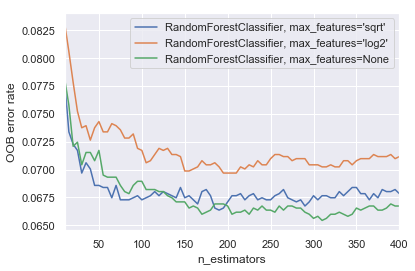

In [5]:
from collections import OrderedDict

# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

print(__doc__)

RANDOM_STATE = 123

# Generate a binary classification dataset.
X = train_final_data.drop("PotentialFraud", axis=1)
y = train_final_data["PotentialFraud"]
    
# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=200,
                               warm_start=True, max_features="sqrt",
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=200,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=200,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 400

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
sns.set()
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

* Model above: OOB error settles around 200:
    * 150 for max_features = 'log2'
    * 180 for max_features = 'sqrt'
    * 300 for max_features = 'None'
* Our best tuned models had 400-600 estimators.

In [30]:
# FEATURE IMPORTANCES FOR BEST RUS RANDOM FOREST MODEL 

X = train_final_data.drop("PotentialFraud", axis=1)
y = train_final_data["PotentialFraud"]

X_sample, X_test, y_sample, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Instantiate
model=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=True, random_state=30, verbose=0,
                       warm_start=False)

# Undersampling 
X_train, y_train = RandomUnderSampler(random_state=0).fit_resample(X_sample, y_sample)
model.fit(X_train, y_train)

# Scores
y_predict_test = model.predict(X_test)

# Classification report
print("\n Test Classification Report:")
print(classification_report(y_test, y_predict_test))
    
# Top feature Importances    
pd.set_option('display.max_rows', 100)
(pd.DataFrame({'Variable':X.columns, 'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)).head(100)

Test accuracy score: 0.853


,Variable,Importance
4365,diag_40390,0.011210
330,Mean_Duration,0.009751
5225,diag_53081,0.008454
2096,diag_2449,0.008196
2333,diag_2762,0.008081
4432,diag_41401,0.007904
339,Median_Duration,0.007530
2439,diag_2851,0.007385
4527,diag_4280,0.007379
2299,diag_2724,0.007350


# MODELING WITH XGB:

In [12]:
# BASELINE:

X = train_final_data.drop("PotentialFraud", axis=1)
y = train_final_data["PotentialFraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# fit model 
model = XGBClassifier(seed=30)
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

# evaluate predictions
print("\n Test Classification Report:")
print(classification_report(y_test, y_pred))


 Test Accuracy:

 Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1216
           1       0.67      0.45      0.54       137

    accuracy                           0.92      1353
   macro avg       0.81      0.71      0.75      1353
weighted avg       0.91      0.92      0.92      1353



In [10]:
# TUNED WITHOUT RESAMPLING
def xgb_tuned(df, target):
    X = df.drop(target, axis=1)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # Instantiate model
    model = XGBClassifier(random_state=30)

    #Parameters
    cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
    ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
    
    # Optimize for accuracy since that is the metric used in the Adult Data Set notation
    model_tuned = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                    cv_params, scoring = 'accuracy', cv = 5, n_jobs = -1)
    model_tuned.fit(X_train, y_train)
                       
    # make predictions for test data
    y_pred = model_tuned.predict(X_test)

    # Classification report
    print("\n Test Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Best Parameters:
    print("Best Parameters", model_tuned.best_params_)

In [15]:
xgb_tuned(train_final_data, "PotentialFraud")


 Test Accuracy:

 Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1216
           1       0.70      0.45      0.55       137

    accuracy                           0.93      1353
   macro avg       0.82      0.72      0.76      1353
weighted avg       0.92      0.93      0.92      1353



In [75]:
# TUNED WITH RANDOM UNDER SAMPLING 
def xgb_rus(df, target):
    X = train_final_data.drop("PotentialFraud", axis=1)
    y = train_final_data["PotentialFraud"]

    X_sample, X_test, y_sample, y_test = \
        train_test_split(X, y, random_state = 42, stratify=y)
    X_train, y_train = RandomUnderSampler(random_state=0).fit_resample(X_sample, y_sample)
    X_train_df = pd.DataFrame(data=X_train, columns=X_test.columns)
    
    # Instantiate model
    model = XGBClassifier(random_state=30)

    #Parameters
    cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
    ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
    
    # Optimize for accuracy since that is the metric used in the Adult Data Set notation
    model_tuned = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                    cv_params, scoring = 'accuracy', cv = 5, n_jobs = -1)
    model_tuned.fit(X_train_df, y_train)
                       
    # make predictions for test data
    y_pred = model_tuned.predict(X_test)

    # Classification report
    print("\n Test Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Best Parameters:
    print("Best Parameters:", model_tuned.best_params_)
    

In [76]:
xgb_rus(train_final_data, "PotentialFraud")


 Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1226
           1       0.39      0.87      0.54       127

    accuracy                           0.86      1353
   macro avg       0.69      0.86      0.73      1353
weighted avg       0.93      0.86      0.88      1353

Best Parameters: {'max_depth': 3, 'min_child_weight': 1}


In [69]:
#Feature Importances
X = train_final_data.drop("PotentialFraud", axis=1)
y = train_final_data["PotentialFraud"]

X_sample, X_test, y_sample, y_test = \
    train_test_split(X, y, random_state = 42, stratify=y)
X_train, y_train = RandomUnderSampler(random_state=0).fit_resample(X_sample, y_sample)
X_train_df = pd.DataFrame(data=X_train, columns=X_test.columns)
        
#fit model 
model = XGBClassifier(max_depth=3, min_child_weight=1, learning_rate=0.1, \
        n_estimators=1000, seed=0, subsample=0.8, colsample_bytree=0.8, \
        objective='binary:logistic')
model.fit(X_train_df, y_train)

# make predictions for test data
y_pred = model.predict(X_test)

# Classification report
print("\n Test Classification Report:")
print(classification_report(y_test, y_pred))
    
# Feature importances
pd.set_option('display.max_rows', 100)
(pd.DataFrame({'Variable':X.columns, 'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)).head(100)


 Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1226
           1       0.39      0.87      0.54       127

    accuracy                           0.86      1353
   macro avg       0.69      0.86      0.73      1353
weighted avg       0.93      0.86      0.88      1353



,Variable,Importance
4432,diag_41401,0.066810
4365,diag_40390,0.044962
5691,diag_5990,0.028702
4527,diag_4280,0.024929
4446,diag_4149,0.020869
11068,diag_V5861,0.017123
2341,diag_2768,0.016310
11316,diag_V7651,0.012111
10334,diag_E9342,0.011915
2333,diag_2762,0.011510
